In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression as SkLinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

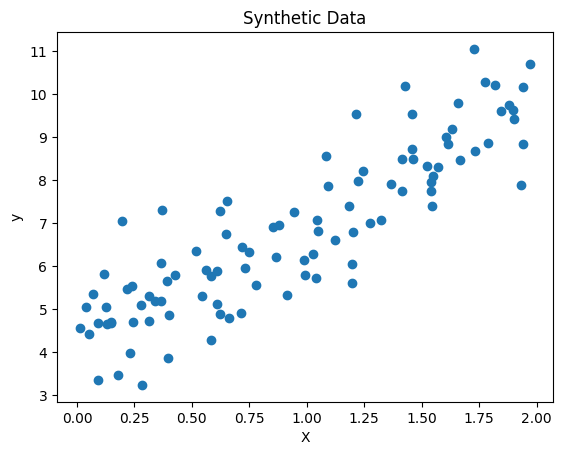

In [5]:
np.random.seed(42)
X= 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)
def plot_line(X, y, y_pred, title="Linear Regression"):
    plt.scatter(X, y, label="Data")
    plt.plot(X, y_pred, color='red', label="Prediction")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.show()

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()

In [6]:
class MatrixLinearRegression:
    def fit(self,X,y):
        X= np.insert(X,0,1,axis=1)
        XT_X_inv = np.linalg.inv(X.T@X)
        weights =np.linalg.multi_dot([XT_X_inv,X.T,y])
        self.bias,self.weights = weights[0],weights[1:]
    def predict (self,X_test):
        X_test = np.array(X_test)
        if X_test.ndim == 1:
            X_test = X_test.reshape(-1, 1)
        return X_test @ self.weights + self.bias

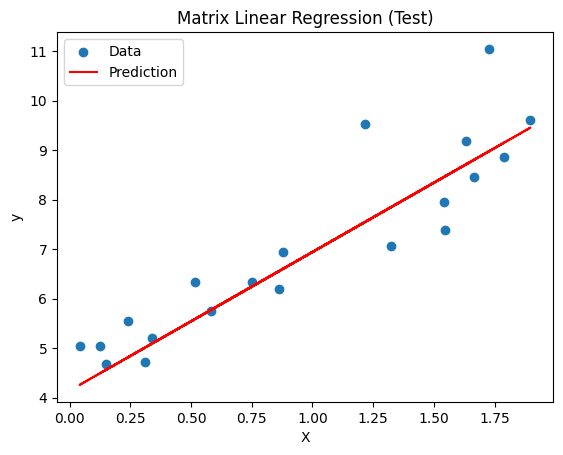

In [7]:
MLR= MatrixLinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
MLR.fit(X_train,y_train)
y_pred = MLR.predict(X_test)
plot_line(X_test, y_test, y_pred, title="Matrix Linear Regression (Test)")


In [8]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()

sk_model.fit(X_train, y_train)

print("Sklearn LinearRegression:")
print("Intercept (bias):", sk_model.intercept_[0])
print("Coefficient (weight):", sk_model.coef_[0][0])

print("\nMatrixLinearRegression:")
print("Bias:", MLR.bias)
print("Weight:", MLR.weights[0])


Sklearn LinearRegression:
Intercept (bias): 4.142913319458566
Coefficient (weight): 2.7993236574802762

MatrixLinearRegression:
Bias: [4.14291332]
Weight: [2.79932366]


# After several experiments with number of points and noise I saw that there is no big difference between them. This method needs huge 

In [26]:
class GDLinearRegression:
    def __init__(self, learning_rate=0.01, tolerance=1e-8,max_iter=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter= max_iter

    def fit(self, X, y):
        y= y.ravel()
        n_samples, n_features = X.shape

        self.bias = 0.0
        self.weights = np.zeros(n_features)
        self.loss_history = []

        previous_db = 0.0
        previous_dw = np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred = X @ self.weights + self.bias
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)
            db = (1 / n_samples) * np.sum(y_pred - y)
            dw = (1 / n_samples) * (X.T @ (y_pred - y))

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw

            if np.abs(db - previous_db) < self.tolerance and \
               np.linalg.norm(dw - previous_dw) < self.tolerance:
                break

            previous_db = db
            previous_dw = dw

    def predict(self, X_test):
        return X_test @ self.weights + self.bias


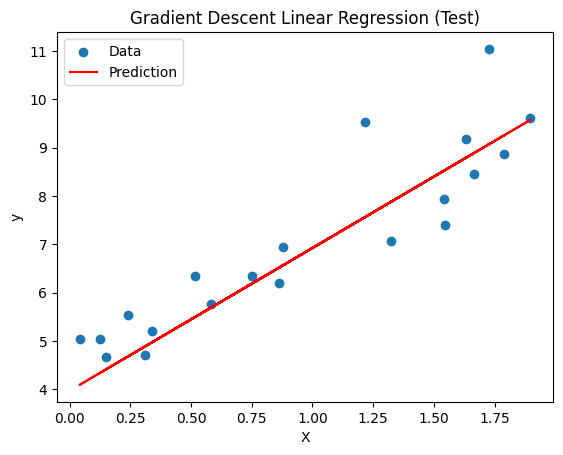

In [35]:
GDLR= GDLinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
GDLR.fit(X_train,y_train)
y_pred = GDLR.predict(X_test)
plot_line(X_test, y_test, y_pred, title="Gradient Descent Linear Regression (Test)")


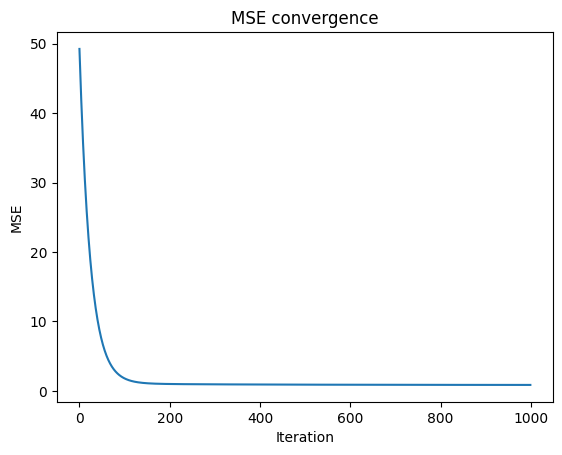

In [28]:
plt.plot(GDLR.loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE convergence")
plt.show()


# As we can see from the graph, convergence of this algorigthms is about 100 iteration. Lets do some experiments

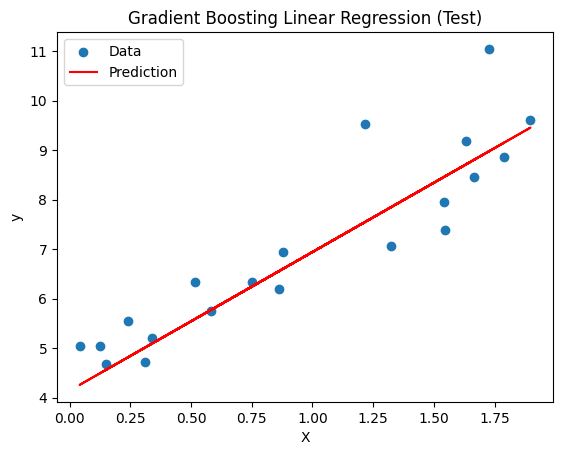

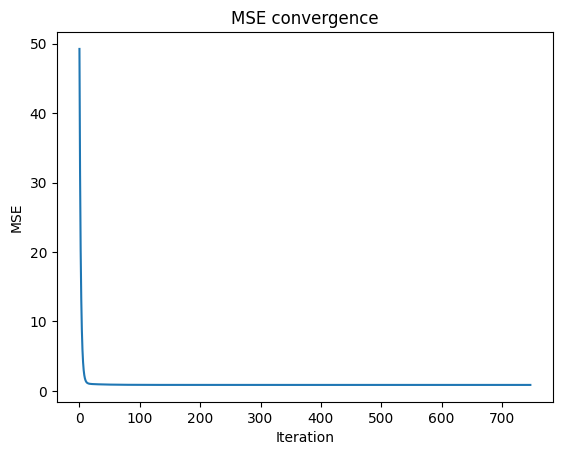

In [30]:
GDLR= GDLinearRegression(learning_rate=0.1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
GDLR.fit(X_train,y_train)
y_pred = GDLR.predict(X_test)
plot_line(X_test, y_test, y_pred, title="Gradient Boosting Linear Regression (Test)")
plt.plot(GDLR.loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE convergence")
plt.show()


# With high learning rate algorithm converges at 10-15 iteration. Usually this learning rate is too high, with complex data it wouldnt work

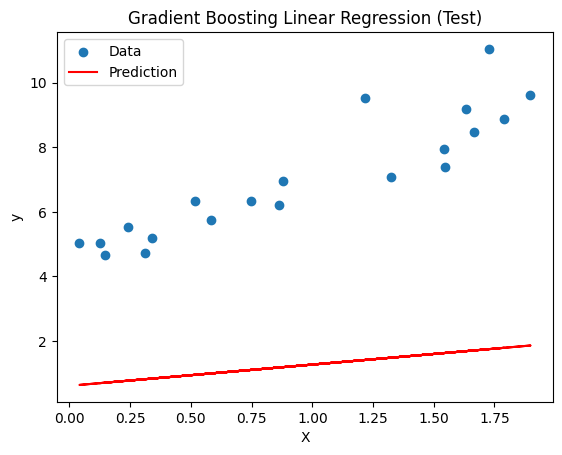

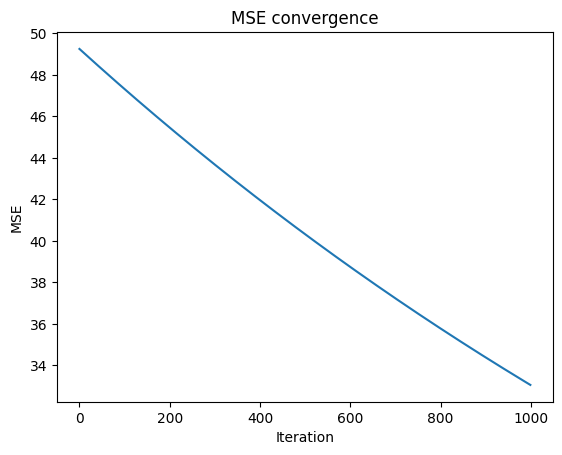

In [31]:
GDLR= GDLinearRegression(learning_rate=0.0001)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
GDLR.fit(X_train,y_train)
y_pred = GDLR.predict(X_test)
plot_line(X_test, y_test, y_pred, title="Gradient Boosting Linear Regression (Test)")
plt.plot(GDLR.loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE convergence")
plt.show()


# With low learning and 1000 iterations our algorithm doesnt converges, because its learns with very small steps

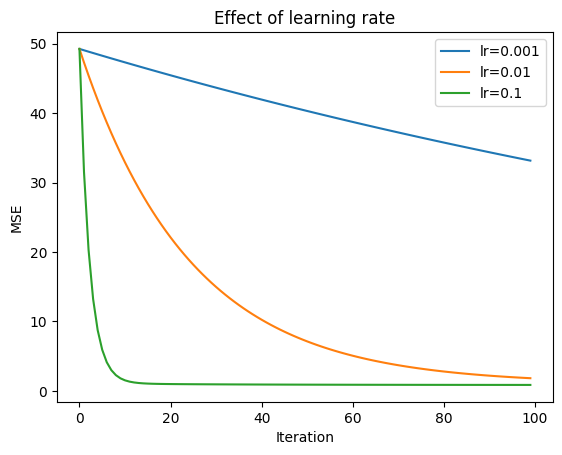

In [33]:
for lr in [0.001, 0.01, 0.1]:
    model = GDLinearRegression(learning_rate=lr, max_iter=100)
    model.fit(X_train, y_train)
    plt.plot(model.loss_history, label=f"lr={lr}")

plt.legend()
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Effect of learning rate")
plt.show()


In [34]:
# Normal Equation
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
w_ne = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

# Gradient Descent
gd = GDLinearRegression(learning_rate=0.1, max_iter=1000)
gd.fit(X_train, y_train)

print("Normal Equation:")
print("bias:", w_ne[0][0], "weight:", w_ne[1][0])

print("Gradient Descent:")
print("bias:", gd.bias, "weight:", gd.weights[0])


Normal Equation:
bias: 4.142913319458571 weight: 2.7993236574802722
Gradient Descent:
bias: 4.142909832916804 weight: 2.7993267653764216


# There almost same. Main difference between them is computance resources. Normal equation has O(d^3),while dradient descent has O(d*n*iterations). With small data normal equation is more effective, but when we work with big data gradient descent is preferable.(d is number of features)